# Programming Assignment 2: Linear Regression

## Instructions

- The aim of this assignment is to give you a hands-on with a real-life machine learning application.
- Use separate training, and testing data as discussed in class.
- You can only use Python programming language and Jupyter Notebooks.
- There are three parts of this assignment. In parts 1 & 2, you can only use **numpy, scipy, pandas, matplotlib and are not allowed to use NLTK, scikit-learn or any other machine learning toolkit**. However, you have to use **scikit-learn** in part 3.
- Carefully read the submission instructions, plagiarism and late days policy below.

## Submission Instructions

Submit your code both as notebook file (.ipynb) and python script (.py) on LMS. The name of both files should be your roll number. If you don’t know how to save .ipynb as .py [see this](https://i.stack.imgur.com/L1rQH.png). **Failing to submit any one of them will result in the reduction of marks**.

## Plagiarism Policy

The code MUST be done independently. Any plagiarism or cheating of work from others or the internet will be immediately referred to the DC. If you are confused about what constitutes plagiarism, it is YOUR responsibility to consult with the instructor or the TA in a timely manner. No “after the fact” negotiations will be possible. The only way to guarantee that you do not lose marks is “DO NOT LOOK AT ANYONE ELSE'S CODE NOR DISCUSS IT WITH THEM”.

## Late Days Policy

The deadline of the assignment is final. However, in order to accommodate all the 11th hour issues there is a late submission policy i.e. you can submit your assignment within 3 days after the deadline with 25% deduction each day.


## Introduction

In this exercise, you will implement linear regression and get to see it work on data. After completing this assignment, you will know:
- How to implement linear regression from scratch.
- How to estimate linear regression parameters using gradient descent.
- How to make predictions on new data using learned parameters.

Let's start with the necessary imports.

In [2]:
import os
import numpy as np
from matplotlib import pyplot
%matplotlib inline

## 1. Linear Regression with one variable

Linear regression assumes a linear relationship between the input variables (X) and the single output variable (Y). More specifically, that output (Y) can be calculated from a linear combination of the input variables (X). When there is a single input variable, the method is referred to as a simple linear regression.

Now you will implement simple linear regression to predict profits for a food truck. Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities. You would like to use this data to help you select which city to expand to next.

### 1.1 Load the dataset

The file `Data/ex1data1.txt` contains the dataset for our linear regression problem. The first column is the population of a city (in 10,000s) and the second column is the profit of a food truck in that city (in $10,000s). A negative value for profit indicates a loss. 

We provide you with the code needed to load this data. The dataset is loaded from the data file into the variables `X` and `Y`.

In [3]:
data = np.loadtxt(os.path.join('Data', 'D:\Downloads\Assignment 2\Assignment 2\Data\ex1data.txt'), delimiter=',')
X, Y = data[:, 0], data[:, 1]

### 1.2 Plot the dataset
Before starting on any task, it is often useful to understand the data by visualizing it. For this dataset, you can use a scatter plot to visualize the data, since it has only two properties to plot (profit and population). Execute the next cell to visualize the data.

Text(0.5, 0, 'Population of City in 10,000s')

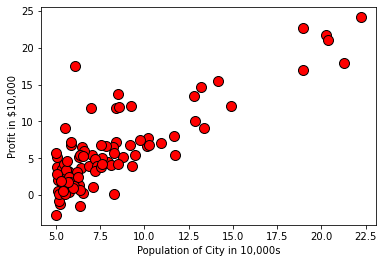

In [4]:
pyplot.plot(X, Y, 'ro', ms=10, mec='k')
pyplot.ylabel('Profit in $10,000')
pyplot.xlabel('Population of City in 10,000s')

### 1.3 Learn the parameters
In this part, you will fit the linear regression parameters $\theta$ to the food truck dataset using gradient descent.

The objective of linear regression is to minimize the cost function

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left( h_{\theta}(x^{(i)}) - y^{(i)}\right)^2 ------ (i)$$ 

where the hypothesis $h_\theta(x)$ is given by the linear model
$$ h_\theta(x) = \theta_0 + \theta_1 x ------ (ii)$$

The parameters of your model are the $\theta_j$ values. These are
the values you will adjust to minimize cost $J(\theta)$. One way to do this is to
use the batch gradient descent algorithm. In batch gradient descent, each
iteration performs the update

$$ \theta_0 = \theta_0 - \alpha \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)}\right) ------ (iii)$$

$$ \theta_1 = \theta_1 - \alpha \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)}\right)x^{(i)} ------ (iv)$$

With each step of gradient descent, your parameters $\theta_j$ come closer to the optimal values that will achieve the lowest cost J($\theta$).

Let's start by implementing the hypothesis $h_\theta(x)$.

In [5]:
### GRADED FUNCTION ###
def predict(x, theta0, theta1):
    '''
    Calculates the hypothesis for any input sample `x` given the parameters `theta`.
    
    Arguments
    ---------
    x : float
        The input sample.
    
    theta0 : float
        The parameter for the regression function.
        
    theta1 : float
        The parameter for the regression function.
    
    Returns
    -------
    h_x : float
        The hypothesis for input sample.
    
    Hint(s)
    -------
    Compute equation (ii).
    '''
    # You need to return the following variable(s) correctly
    h_x = 0.0
    
    ### START CODE HERE ### (≈ 1 line of code)
    h_x = theta0 + (theta1 * x)
    ### END CODE HERE ###
    
    return h_x

Execute the next cell to verify your implementation.

In [6]:
h_x = predict(x=2, theta0=1.0, theta1=1.0)
print('With x = 2, theta0 = 1.0, theta1 = 1.0\nPredicted Hypothesis h(x) = %.2f' % h_x)
print("Expected hypothesis h(x) = 3.00\n")

With x = 2, theta0 = 1.0, theta1 = 1.0
Predicted Hypothesis h(x) = 3.00
Expected hypothesis h(x) = 3.00



As you perform gradient descent to learn minimize the cost function  $J(\theta)$, it is helpful to monitor the convergence by computing the cost. In this section, you will implement a function to calculate  $J(\theta)$ so you can check the convergence of your gradient descent implementation.

In [7]:
### GRADED FUNCTION ###
def computeCost(X, Y, theta0, theta1):
    '''
    Computes cost for linear regression. Computes the cost of using `theta` as the
    parameter for linear regression to fit the data points in `X` and `Y`.
    
    Arguments
    ---------
    X : array
        The input dataset of shape (m, ), where m is the number of training examples.
    
    Y : array
        The values of the function at each data point. This is a vector of
        shape (m, ), where m is the number of training examples.
    
    theta0 : float
        The parameter for the regression function.
        
    theta1 : float
        The parameter for the regression function.
    
    Returns
    -------
    J : float
        The value of the regression cost function.
    
    Hint(s)
    -------
    Compute equation (i).
    '''
    # initialize some useful values
    m = Y.size  # number of training examples
    
    # You need to return the following variable(s) correctly
    J = 0
        
    ### START CODE HERE ### (≈ 3-4 lines of code)
    for i in range(m):
      J = J + pow(predict(X[i], theta0, theta1) - Y[i], 2)
    J = (1/(2*m)) * J

    ### END CODE HERE ###
    
    return J

Execute the next cell to verify your implementation.

In [8]:
J = computeCost(X, Y, theta0=1.0, theta1=1.0)
print('With theta0 = 1.0, theta1 = 1.0\nPredicted cost J = %.2f' % J)
print("Expected cost J = 10.27\n")

With theta0 = 1.0, theta1 = 1.0
Predicted cost J = 10.27
Expected cost J = 10.27



Next, you will complete a function which implements gradient descent. The loop structure has been written for you, and you only need to supply the updates to parameters $\theta_j$  within each iteration (epoch). 

The starter code for the function `gradientDescent` calls `computeCost` on every iteration and saves the cost to a `python` list. Assuming you have implemented `gradientDescent` and `computeCost` correctly, your value of $J(\theta)$ should never increase, and should converge to a steady value by the end of the algorithm.

In [9]:
### GRADED FUNCTION ###
def gradientDescent(X, Y, alpha, n_epoch):
    """
    Performs gradient descent to learn `theta`. Updates `theta` by taking `n_epoch`
    gradient steps with learning rate `alpha`.
    
    Arguments
    ---------
    X : array
        The input dataset of shape (m, ), where m is the number of training examples.
    
    Y : array
        The values of the function at each data point. This is a vector of
        shape (m, ), where m is the number of training examples.
    
    alpha : float
        The learning rate.
    
    n_epoch : int
        The number of iterations for gradient descent. 
    
    Returns
    -------
    theta0 : float
        The parameter for the regression function.
        
    theta1 : float
        The parameter for the regression function.
    
    J : list
        A python list for the values of the cost function after each iteration.
    
    Hint(s)
    -------
    Compute equation (iii) and (iv).

    While debugging, it can be useful to print out the values of 
    the cost function (computeCost) here.
    """
    # initialize some useful values
    m = Y.size  # number of training examples
    J = list()  # list to store cost
    
    # You need to return the following variables correctly
    theta0 = 0.0
    theta1 = 0.0
    
    for epoch in range(n_epoch):
        ### START CODE HERE ### (≈ 5-10 lines of code)
        hx = [predict(x, theta0, theta1) for x in X]
        theta0 -= (alpha/m) * np.sum(hx - Y)
        theta1 -= (alpha/m) * np.sum((hx - Y) * X)
        J.append(computeCost(X, Y, theta0, theta1))
        
        ### END CODE HERE ###

    return theta0, theta1, J

Execute the next cell to verify your implementation.

In [10]:
n_epoch = 1500
alpha = 0.01

theta0, theta1, J = gradientDescent(X ,Y, alpha, n_epoch)
print('Predicted theta0 = %.4f, theta1 = %.4f, cost = %.4f' % (theta0, theta1, J[-1]))
print('Expected theta0 = -3.6303, theta1 = 1.1664, cost = 4.4834')

Predicted theta0 = -3.6303, theta1 = 1.1664, cost = 4.4834
Expected theta0 = -3.6303, theta1 = 1.1664, cost = 4.4834


### 1.4 Plot the linear fit

Use your learned parameters $\theta_j$ to plot the linear fit.

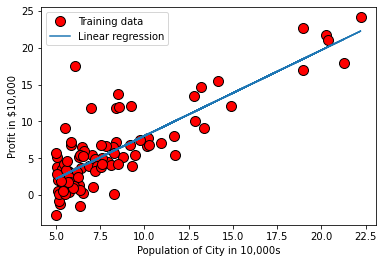

In [11]:
h_x = list()
for x in X:
    h_x.append(predict(x, theta0, theta1))
pyplot.plot(X, Y, 'ro', ms=10, mec='k')
pyplot.ylabel('Profit in $10,000')
pyplot.xlabel('Population of City in 10,000s')
pyplot.plot(X, h_x, '-')
pyplot.legend(['Training data', 'Linear regression'])

### 1.5 Make predictions

Use your learned parameters $\theta_j$ to make food truck profit predictions in areas with population of 40,000 and 65,000.

In [12]:
print('For population = 40,000, predicted profit = $%.2f' % (predict(4, theta0, theta1)*10000))
print('For population = 65,000, predicted profit = $%.2f' % (predict(6.5, theta0, theta1)*10000))

For population = 40,000, predicted profit = $10351.58
For population = 65,000, predicted profit = $39510.64


## 2. Multivariate Linear Regression

Now, you will implement multivariate linear regression (from scratch) to predict the the median price of homes in a Boston suburb during the mid-1970s. To do this, you are given with the dataset that has 404 examples in the train set and 102 examples in test set. Each example has 13 input variables (features) and one output variable (price in $10,000s). Below is the description of input variables:

- Per capita crime rate.
- The proportion of residential land zoned for lots over 25,000 square feet.
- The proportion of non-retail business acres per town.
- Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
- Nitric oxides concentration (parts per 10 million).
- The average number of rooms per dwelling.
- The proportion of owner-occupied units built before 1940.
- Weighted distances to five Boston employment centers.
- Index of accessibility to radial highways.
- Full-value property-tax rate per $10,000.
- Pupil-teacher ratio by town.
- 1000 * (Bk - 0.63) ** 2 where Bk is the proportion of Black people by town.
- Percentage lower status of the population.

Each one of these input features is stored using a different scale. Some features are represented by a proportion between 0 and 1, other features are ranges between 1 and 12, some are ranges between 0 and 100, and so on. This is often the case with real-world data, and understanding how to explore and clean such data is an important skill to develop.

A common way to normalize features that use different scales and ranges is:

- Subtract the mean value of each feature from the dataset.
- After subtracting the mean, additionally scale (divide) the feature values by their respective standard deviations.

Note: We only use examples of the train set to estimate the mean and standard deviation.

You have to follow exactly the same steps as above i.e. implement hypothesis, cost function and gradient descent for multivariate linear regression to learn parameters $\theta$ using train set. Finally, report the cost (error) using your learned parameters $\theta$ on test set. Expected Mean Square Error on this dataset is 11.5 - 12.5 approximately. 

We provide you with the code needed to load this dataset. The dataset is loaded from the data files into the variables `train_X`, `train_Y`, `test_X` and `test_Y`.

In [41]:
train_X = np.loadtxt(os.path.join('Data', 'D:\Downloads\Assignment 2\Assignment 2\Data\ex2traindata.txt'))
train_Y = np.loadtxt(os.path.join('Data', 'D:\Downloads\Assignment 2\Assignment 2\Data\ex2trainlabels.txt'))
test_X = np.loadtxt(os.path.join('Data', 'D:\Downloads\Assignment 2\Assignment 2\Data\ex2testdata.txt'))
test_Y = np.loadtxt(os.path.join('Data', 'D:\Downloads\Assignment 2\Assignment 2\Data\ex2testlabels.txt'))

In [42]:
''' Start your code of part 2 from here, add the new code cells as per your requirement. '''
# Normalizes the data by subtracting the mean and then dividing by std dev
def normalize(X):
  mean = np.mean(X, axis=0)
  std = np.std(X, axis=0)
  return ((X-mean)/std)

# predictions
def pred(X, theta, b):
    h_x = np.dot(theta, X.T) + b
    return h_x

# compute cost
def compCost(Y, h_x):
    m = Y.shape[0]  # number of training examples
    J = (1/(2*m)) * np.sum(np.square(h_x - Y))
    return J

# fit
def gradDescent(X, Y, alpha, n_epoch):
   
    m = Y.shape[0]  # number of training examples
    J = list()  # list to store cost
    theta = np.zeros((1, X.shape[1]))
    b = np.zeros((1,1))

    for epoch in range(n_epoch):
        h_x = pred(X, theta, b)
        error = h_x - Y
        theta -= ((1/m) * alpha * (np.matmul(error, X)))
        b -= ((1/m) * alpha * np.sum(error))   
        J.append(compCost(Y, h_x))

    return J, theta, b

# test your model
def test(X, Y, theta, b):
  h_x = pred(X, theta, b)
  return compCost(Y, h_x)

In [43]:
# normalize data
train_X = normalize(train_X)
test_X = normalize(test_X)

In [44]:
#  fit the model
J, theta, b= gradDescent(train_X, train_Y, alpha=0.01, n_epoch=1500)

In [45]:
# test 
mse = test(test_X, test_Y, theta, b)
print("Expected mean square error (MSE) = ", mse)

Expected mean square error (MSE) =  10.322831403890335


## 3. Regularized Linear Regression

Now, you'll use the [scikit-learn](https://scikit-learn.org/stable/index.html) to implement [Linear Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html), [Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge), [Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso), [Elastic Net](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html#sklearn.linear_model.ElasticNet) and apply them to Boston house pricing dataset (provided in part 2). Try out different values of regularization coefficient (known as alpha in scikit-learn) and use the [Mean Squared Error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) to report loss with each regression. Finally, plot the regularization coefficients alpha (x-axis) with learned parameters $\theta$ (y-axis) for Ridge and Lasso. Please read [this blog](https://scienceloft.com/technical/understanding-lasso-and-ridge-regression/) to get better understanding of the desired plots.

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn import linear_model



In [38]:
import numpy as np
import matplotlib.pyplot as plt
import os
train_X = np.loadtxt(os.path.join('Data', 'D:\Downloads\Assignment 2\Assignment 2\Data\ex2traindata.txt'))
train_Y = np.loadtxt(os.path.join('Data', 'D:\Downloads\Assignment 2\Assignment 2\Data\ex2trainlabels.txt'))
test_X = np.loadtxt(os.path.join('Data', 'D:\Downloads\Assignment 2\Assignment 2\Data\ex2testdata.txt'))
test_Y = np.loadtxt(os.path.join('Data', 'D:\Downloads\Assignment 2\Assignment 2\Data\ex2testlabels.txt'))
regr=LinearRegression()
regr.fit(train_X,train_Y)
predictions=regr.score(test_X,test_Y)
y_regr=regr.predict(test_X)
print(y_regr)

print(mean_squared_error(test_Y, y_regr))


[ 9.69267239 21.05859431 20.94145461 34.25223414 25.95902598 20.56741038
 28.15310405 25.07113862 20.30519458 22.82489511 20.29027213 18.07938917
 16.46141024 35.31166595 19.41369959 19.34727116 24.58140904 21.01346252
 19.99079236 23.79286427 12.20780045 17.14218992 22.51468752 12.92570511
 21.18070615 23.94073547 33.46176314 24.2631555  13.35213096 20.71939252
 23.45082103 19.1486881  36.09743765 23.47113531 19.03141995  5.92425733
 14.02090469 22.96425377 16.01731242 27.09134249 22.06997029 28.61755389
 17.75679772 34.75579014 31.29455712 24.73234165 31.12655323 18.09268992
 22.62638989 24.21208909 30.5854317  18.71860574 10.50163617 13.73779292
 34.4022841  27.53140317 18.08151522 40.05101982 37.63271513 24.64021422
 25.73823434 20.64369987 20.33514699 21.38393124 24.63485497 23.53071805
 17.42141466 26.76911736  3.83782148 11.97063636 24.2602519  23.67191799
 23.66639182  8.4403269  28.52690962 20.94071229 20.44489658 24.77678169
 33.77299778  7.02038331 24.55379254 36.73923493 16

[ 9.39856575 20.50624944 21.57130432 33.36540233 25.61028236 20.99263222
 28.71995631 24.87229821 19.88375387 22.28300617 19.90485025 18.26792666
 16.40957978 35.53016206 18.85902273 19.50272481 24.27551021 20.87535722
 19.50714827 24.69470307 11.52798774 16.33455311 22.42878093 12.66562797
 21.28416244 23.13588726 32.915096   25.17457714 13.13132004 20.51717897
 23.16771266 18.17197362 35.87693962 23.141157   18.60220629  6.00254147
 15.60180328 22.33507389 15.3535816  27.61263476 22.4649764  28.21092786
 18.15490617 35.01620664 31.02216739 24.61276072 31.10364938 18.15183519
 23.24857071 24.09132879 31.18942752 17.82052871 10.56289033 13.84047016
 33.91372541 27.34549734 18.20645506 40.25034402 37.26382254 24.34647993
 25.58241293 20.8080617  19.44387436 21.65384862 24.7917025  23.57930203
 17.7439233  26.53004086  2.73621002 12.06188366 25.07095781 24.28437818
 22.58634007  7.42686055 28.20683204 20.83255722 20.14923035 24.74508011
 33.5627065   6.97044992 24.24465434 37.33175609 15

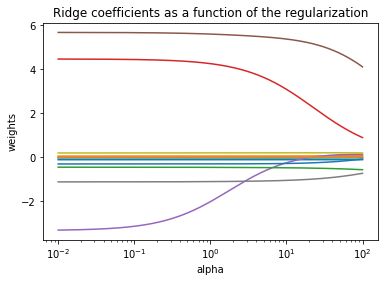

22.548158689769725


In [39]:
train_X = np.loadtxt(os.path.join('Data', 'D:\Downloads\Assignment 2\Assignment 2\Data\ex2traindata.txt'))
train_Y = np.loadtxt(os.path.join('Data', 'D:\Downloads\Assignment 2\Assignment 2\Data\ex2trainlabels.txt'))
test_X = np.loadtxt(os.path.join('Data', 'D:\Downloads\Assignment 2\Assignment 2\Data\ex2testdata.txt'))
test_Y = np.loadtxt(os.path.join('Data', 'D:\Downloads\Assignment 2\Assignment 2\Data\ex2testlabels.txt'))
ridger=Ridge(alpha=1)
ridger.fit(train_X,train_Y)
y_ridger=ridger.predict(test_X)
print(y_ridger)
n_alphas = 1000
alphas = np.logspace(-2, 2, n_alphas)

coefs = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(train_X, train_Y)
    coefs.append(ridge.coef_)

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale("log")

plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("Ridge coefficients as a function of the regularization")
plt.axis("tight")
plt.show()
print(mean_squared_error(test_Y, y_ridger))  


[ 9.69267239 21.05859431 20.94145461 34.25223414 25.95902598 20.56741038
 28.15310405 25.07113862 20.30519458 22.82489511 20.29027213 18.07938917
 16.46141024 35.31166595 19.41369959 19.34727116 24.58140904 21.01346252
 19.99079236 23.79286427 12.20780045 17.14218992 22.51468752 12.92570511
 21.18070615 23.94073547 33.46176314 24.2631555  13.35213096 20.71939252
 23.45082103 19.1486881  36.09743765 23.47113531 19.03141995  5.92425733
 14.02090469 22.96425377 16.01731242 27.09134249 22.06997029 28.61755389
 17.75679772 34.75579014 31.29455712 24.73234165 31.12655323 18.09268992
 22.62638989 24.21208909 30.5854317  18.71860574 10.50163617 13.73779292
 34.4022841  27.53140317 18.08151522 40.05101982 37.63271513 24.64021422
 25.73823434 20.64369987 20.33514699 21.38393124 24.63485497 23.53071805
 17.42141466 26.76911736  3.83782148 11.97063636 24.2602519  23.67191799
 23.66639182  8.4403269  28.52690962 20.94071229 20.44489658 24.77678169
 33.77299778  7.02038331 24.55379254 36.73923493 16

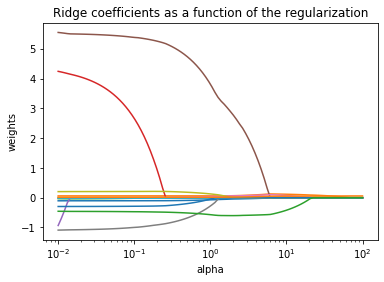

23.195599256423154


In [40]:
train_X = np.loadtxt(os.path.join('Data', 'D:\Downloads\Assignment 2\Assignment 2\Data\ex2traindata.txt'))
train_Y = np.loadtxt(os.path.join('Data', 'D:\Downloads\Assignment 2\Assignment 2\Data\ex2trainlabels.txt'))
test_X = np.loadtxt(os.path.join('Data', 'D:\Downloads\Assignment 2\Assignment 2\Data\ex2testdata.txt'))
test_Y = np.loadtxt(os.path.join('Data', 'D:\Downloads\Assignment 2\Assignment 2\Data\ex2testlabels.txt'))
l=Lasso(alpha =1)
l.fit(train_X,train_Y)

y_l=regr.predict(test_X)
print(y_l)
n_alphas = 100
alphas = np.logspace(-2, 2, n_alphas)

coefs_l = []
for a in alphas:
    lass = linear_model.Lasso(alpha=a, fit_intercept=False)
    lass.fit(train_X, train_Y)
    coefs_l.append(lass.coef_)

ax = plt.gca()

ax.plot(alphas, coefs_l)
ax.set_xscale("log")

plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("Ridge coefficients as a function of the regularization")
plt.axis("tight")
plt.show()
print(mean_squared_error(test_Y, y_l))